In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Salary = pd.read_csv('Employee_Salary.csv')

In [4]:
Salary.head(5)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
Salary.tail(10)

,Years of Experience,Salary
1990,18.583977,374277.2253
1991,18.806528,390051.2268
1992,18.817387,392165.2403
1993,19.063416,413149.8396
1994,19.164009,420555.4056
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [6]:
Salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [7]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


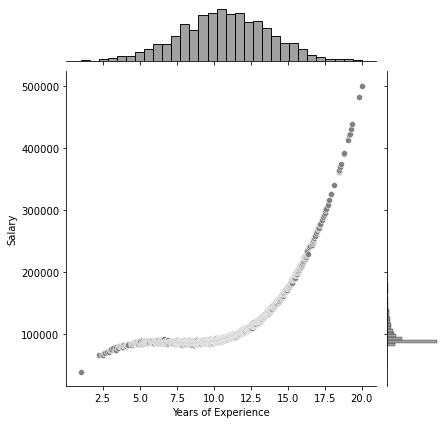

In [9]:
sns.jointplot(x='Years of Experience',y='Salary',data=Salary,color='grey')

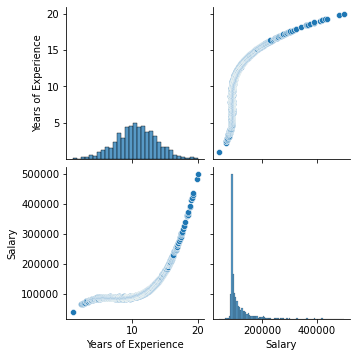

In [12]:
sns.pairplot(Salary)

In [20]:
X=Salary[['Years of Experience']]

In [21]:
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [22]:
X.shape


(2000, 1)

In [23]:
Y=Salary[['Salary']]

In [24]:
Y

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


In [25]:
Y.shape

(2000, 1)

In [28]:
X_train=X
Y_train=Y

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)

LinearRegression()

In [32]:
print('Linear regression coeff (m)',regressor.coef_)
print('Linear regression coeff (b)',regressor.intercept_)

Linear regression coeff (m) [[11640.22916165]]
Linear regression coeff (b) [-13063.09931519]


Text(0.5, 1.0, 'Salary vs Years of Experience')

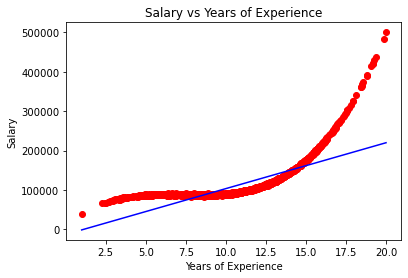

In [35]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor=PolynomialFeatures(degree=2)

In [39]:
X_columns=poly_regressor.fit_transform(X_train)

In [40]:
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [49]:
regressor=LinearRegression()
regressor.fit(X_columns,Y_train)

LinearRegression()

In [50]:
print('model coeff: (m)', regressor.coef_)

model coeff: (m) [[     0.         -33106.32895617   2095.78613853]]


In [51]:
Y_predict=regressor.predict(poly_regressor.fit_transform(X_train))

In [52]:
Y_predict

array([[176035.41084767],
       [142978.73429447],
       [138495.41274285],
       ...,
       [351309.70152322],
       [375297.5979639 ],
       [383233.82995221]])

Text(0.5, 1.0, 'Salary vs Years of Experience')

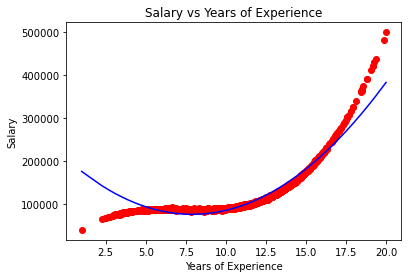

In [55]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,Y_predict,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')